# Importing Libraries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Reading iris dataset

In [112]:
df = sns.load_dataset('iris')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


# Data profiling and inspection

In [113]:
# Checking the datatypes
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

* data contains float and object

In [114]:
# descritive statistic
df.describe() # numerical data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### sepal_length
* mean of sepal_length  is 5.843333
* min of sepal_length  is 4.3
* max of sepal_length  is 7.9
* median of sepal_legth is 5.8
* 5.1 data of sepal_length falls below 25%
* 6.4 data of sepal_length falls below 75%

##### sepal_width
* mean of sepal_width  is 3.05733
* min of sepal_width  is 2
* max of sepal_width  is 4.4
* median of sepal_width is 3.
* 2.8 data of sepal_width falls below 25%
* 3.3 data of sepal_width falls below 75%

##### petal_length
* mean of petal_length  is 3.758000
* min of petal_length  is 1
* max of petal_length  is 6.9
* median of petal_length is 4.35
* 1.6 data of petal_length falls below 25%
* 5.1 data of petal_length falls below 75%
* 
##### petal_width
* mean of petal_width  is 1.199333
* min of petal_width  is 0.1
* max of petal_width  is 2.5
* median of petal_width is 1.3
* 0.3 data of petal_width falls below 25%
* 1.8 data of petal_width falls below 75%

In [115]:
df.describe(include="object") # categorical data

,species
count,150
unique,3
top,setosa
freq,50


* total unique data in species is 3
* most frequently species is setosa with 50

# Shape

In [116]:
df.shape

(150, 5)

* data contains 150 rows and 5 columns

# Overview overall information of data

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* total number of row is 150
* total number of columns is 5
* total number of float datatype is 4
* total number of object datatype is 1

### Checking null data 

<Axes: >

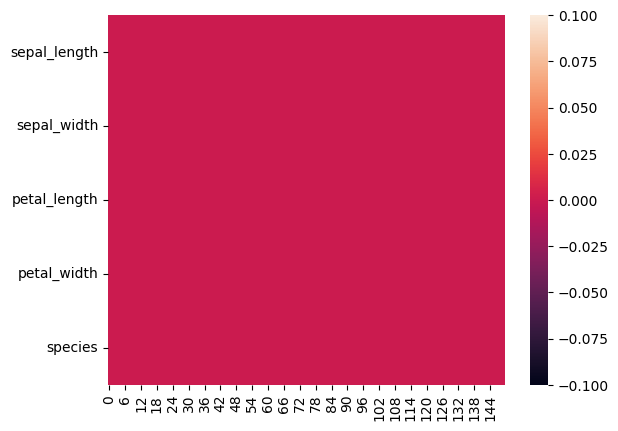

In [118]:
sns.heatmap(df.isna().transpose())

* we seen there is not missing data in this dataset

# Exploratory Data Analysis(EDA)
#### Visualize Target Class

In [119]:
s = df['species'].value_counts()
s

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#### Distribution of species

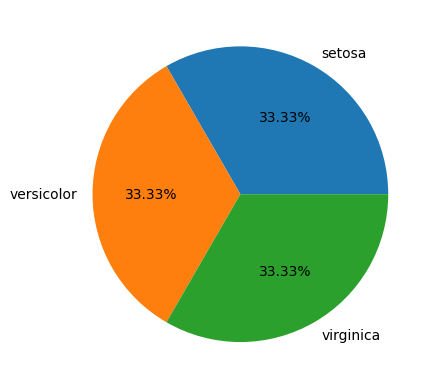

In [120]:
plt.pie(x=s.values, labels=s.index, autopct="%.2f%%")
plt.show()

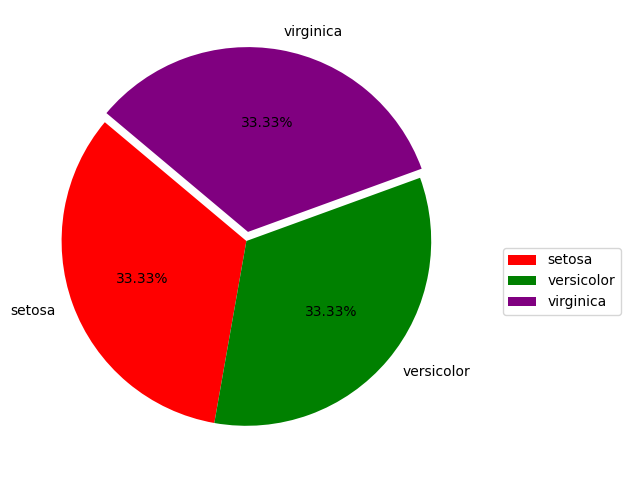

In [121]:
plt.figure(figsize=(8,6))
plt.pie(x=s.values, labels=s.index, autopct="%.2f%%",startangle=140, explode=(0, 0, 0.05),colors=["red","green","purple"])
plt.legend(bbox_to_anchor= (1.04,0.5))
plt.show()

### Distribution of all possible related columns

<Figure size 1200x800 with 0 Axes>

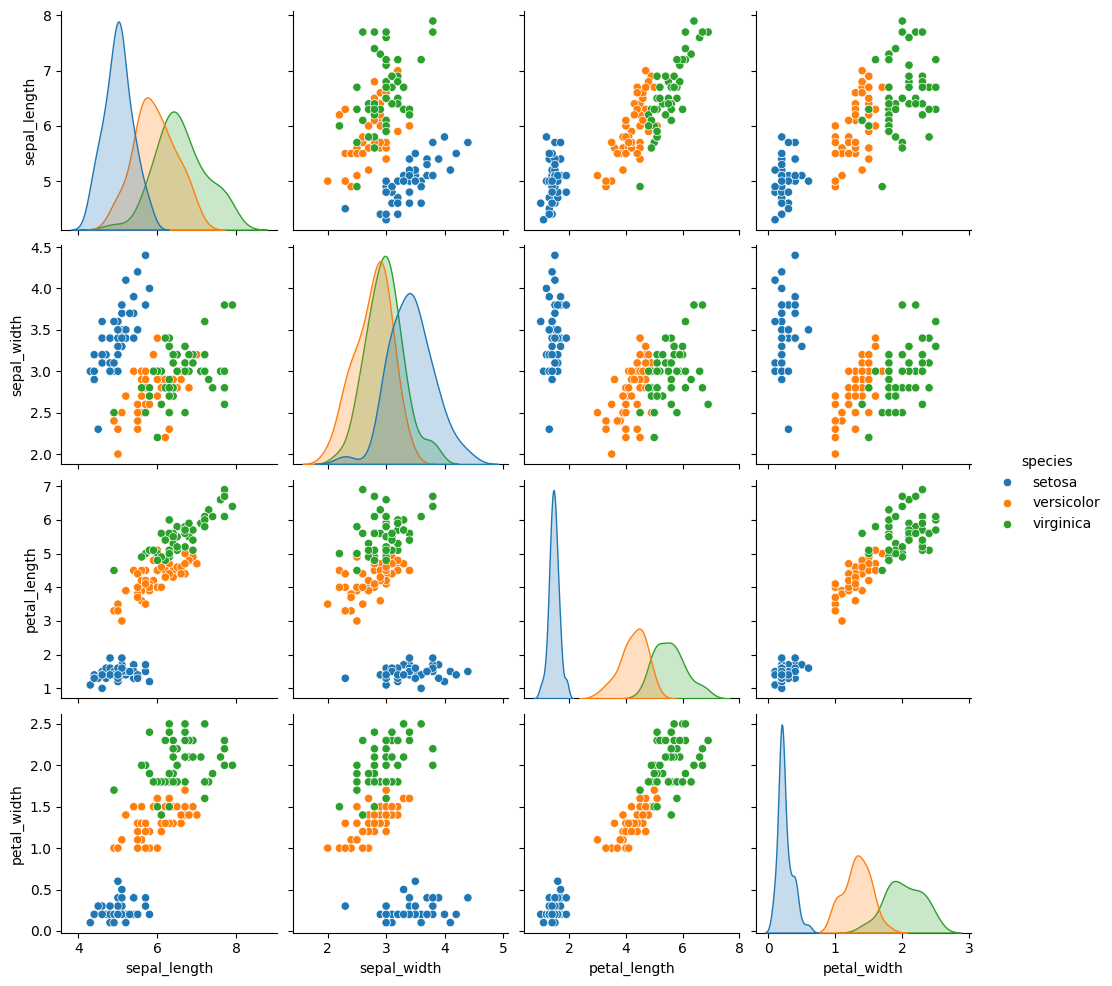

In [122]:
plt.figure(figsize=(12,8))
sns.pairplot(df, hue='species')
plt.show()

# Features selection

In [123]:
data = df.drop(columns='species')
labels = df.species

In [124]:
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


# Train test split

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=40)

In [126]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [127]:
X_test.shape, y_test.shape

((30, 4), (30,))

# Modeling: LogisticRegression

In [128]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Prediction

In [129]:
y_pred = model.predict(X_test)
y_pred

array(['setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor'],
      dtype=object)

# Evaluation

##### Confusion Matrix

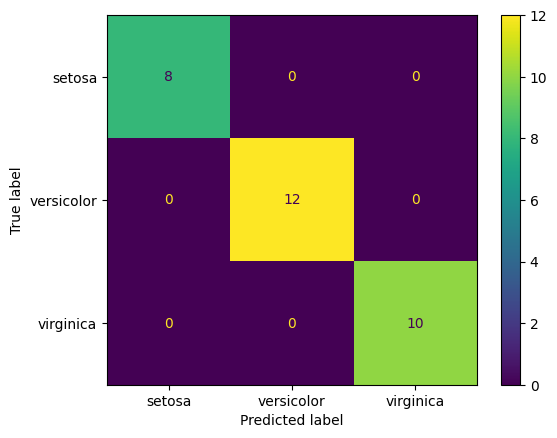

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [131]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_true =y_test, y_pred=y_pred)
m

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

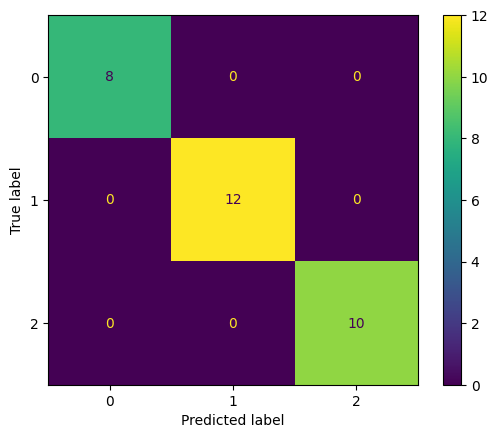

In [132]:
disp = ConfusionMatrixDisplay(confusion_matrix=m)
disp.plot()

#### Classification report

In [133]:
_report = classification_report(y_true=y_test, y_pred=y_pred)
print(_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Accuracy

In [134]:
accuracy_score(y_test, y_pred)

1.0

#### Precision

In [135]:
precision_score(y_test, y_pred,average='weighted')

1.0

#### Recall

In [136]:
recall_score(y_test, y_pred,average='macro')

1.0

In [137]:
model.predict([[5.1,	3.5,	1.4,	0.2]])

C:\Users\Thinkpad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [138]:
y_test.index = range(0, len(y_test))

In [139]:
y_pred

array(['setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor'],
      dtype=object)

In [140]:
count_0tp = 0
count_0fp_1 = 0
count_0fp_2 = 0

count_1tp = 0
count_1fp_0 = 0
count_1fp_2 = 0

count_2tp = 0
count_2fp_0 = 0
count_2fp_1 = 0

for i in range(len(y_test)):
    if y_test[i] == y_test.unique()[0] and y_pred[i] == y_test.unique()[0]:
        count_0tp += 1
        if y_test[i] == y_test.unique()[0] and y_pred[i] == y_test.unique()[1]:
            count_0fp_1 += 1
        elif y_test[i] == y_test.unique()[0] and y_pred[i] == y_test.unique()[2]:
            count_0fp_2 += 1
    elif y_test[i] == y_test.unique()[1] and y_pred[i] == y_test.unique()[1]: 
        count_1tp += 1
        if y_test[i] == y_test.unique()[1] and y_pred[i] == y_test.unique()[0]:
            count_1fp_0 += 1
        elif y_test[i] == y_test.unique()[1] and y_pred[i] == y_test.unique()[2]:
            count_1fp_2 += 1
    elif y_test[i] == y_test.unique()[2] and y_pred[i] == y_test.unique()[2]: 
        count_2tp += 1
        if y_test[i] == y_test.unique()[2] and y_pred[i] == y_test.unique()[0]:
            count_2fp_0 += 1
        elif y_test[i] == y_test.unique()[2] and y_pred[i] == y_test.unique()[1]:
            count_2fp_1 += 1

In [141]:
class_1 = count_0tp, count_0fp_1, count_0fp_2

In [142]:
class_2 = count_1fp_0, count_1tp,count_1fp_2

In [143]:
class_3 = count_2fp_0, count_2fp_1,count_2tp

In [144]:
matrix = np.array([[class_1,class_2,class_3]])

In [145]:
matrix

array([[[ 8,  0,  0],
        [ 0, 12,  0],
        [ 0,  0, 10]]])

In [146]:
matrix.shape

(1, 3, 3)

In [147]:
counts = {unique_val: {'tp': 0, 'fp': {other_val: 0 for other_val in y_test.unique() if other_val != unique_val}} for unique_val in y_test.unique()}

for i in range(len(y_test)):
    true_label = y_test[i]
    pred_label = y_pred[i]
    
    if true_label == pred_label:
        counts[true_label]['tp'] += 1
    else:
        counts[true_label]['fp'][pred_label] += 1


In [148]:
counts

{'setosa': {'tp': 8, 'fp': {'versicolor': 0, 'virginica': 0}},
 'versicolor': {'tp': 12, 'fp': {'setosa': 0, 'virginica': 0}},
 'virginica': {'tp': 10, 'fp': {'setosa': 0, 'versicolor': 0}}}

# Creating Confusion Matrix

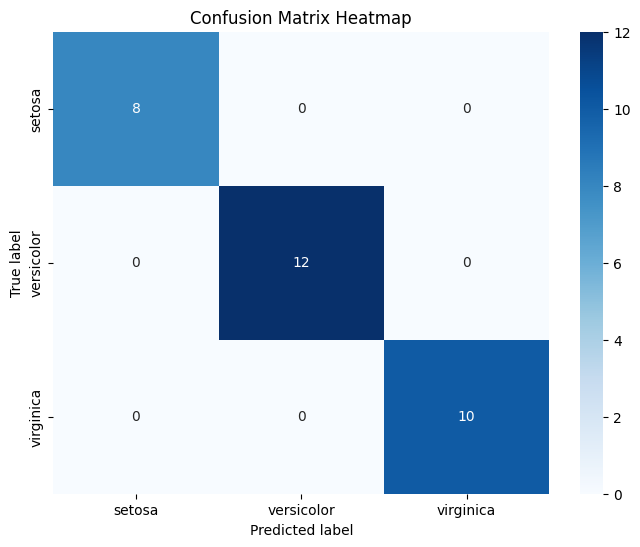

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix data
conf_matrix = np.array([[8, 0, 0],
                         [0, 12, 0],
                         [0, 0, 10]])



# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=[y_test.unique()[0], y_test.unique()[1], y_test.unique()[2]], yticklabels=[y_test.unique()[0], y_test.unique()[1], y_test.unique()[2]])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Heatmap')
plt.show()


# Precision

In [150]:
precision = count_0tp/(count_0tp + count_1fp_0+count_2fp_0)
precision

1.0

In [151]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

In [152]:
cm.shape

(3, 3)

In [153]:
cm.ndim

2

In [154]:
counts = {unique_val: {'tp': 0, 'fp': {other_val: 0 for other_val in y_test.unique() if other_val != unique_val}} for unique_val in y_test.unique()}

for i in range(len(y_test)):
    true_label = y_test[i]
    pred_label = y_pred[i]
    
    if true_label == pred_label:
        counts[true_label]['tp'] += 1
    else:
        counts[true_label]['fp'][pred_label] += 1

In [155]:
counts

{'setosa': {'tp': 8, 'fp': {'versicolor': 0, 'virginica': 0}},
 'versicolor': {'tp': 12, 'fp': {'setosa': 0, 'virginica': 0}},
 'virginica': {'tp': 10, 'fp': {'setosa': 0, 'versicolor': 0}}}

In [156]:
for i,j in enumerate(counts):
    print(i)

0
1
2


In [157]:
for i, true_label in enumerate(counts):
    for j , pred_label in enumerate(counts):
        if i == j:
            matrix 
       

In [158]:
counts[true_label]['fp']

{'setosa': 0, 'versicolor': 0}

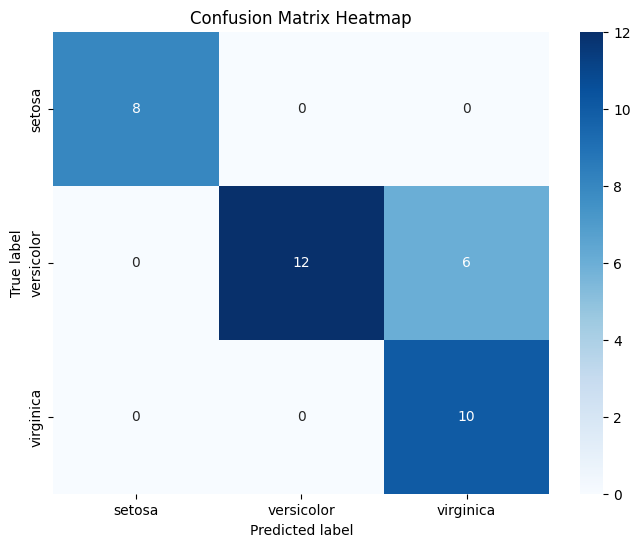

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix data
conf_matrix = np.array([[8, 0, 0],
                         [0, 12, 6],
                         [0, 0, 10]])



# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=[y_test.unique()[0], y_test.unique()[1], y_test.unique()[2]], yticklabels=[y_test.unique()[0], y_test.unique()[1], y_test.unique()[2]])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [160]:
sum = 0
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        sum += conf_matrix[i][j]
sum

36

In [161]:
np.sum(conf_matrix)

36

In [162]:
 def confsion_matirx(y_true, y_pred):
       
        counts = {unique_val: {'tp': 0, 'fp': {other_val: 0 for other_val in y_test.unique() if other_val != unique_val}} for unique_val in y_test.unique()}

        for true_label, pred_label in zip(y_test, y_pred):
            if true_label == pred_label:
                counts[true_label]['tp'] += 1
            else:
                counts[true_label]['fp'][pred_label] += 1
                
        num_class = len(counts)
        
        matrix = np.zeros((num_class, num_class), dtype=int)
        
        for i , true_label in enumerate(counts):
            for j , pred_label in enumerate(counts):
                if i == j:
                    matrix[i][j] = counts[true_label]['tp']
                else:
                    matrix[i][j] = counts[true_label]['fp'].get(pred_label)
        return matrix
def accuracy(y_true, y_pred):
        matrix = confsion_matirx(y_true, y_pred)
        len_matrix = len(matrix)
        print(len_matrix)
        total_sum = np.sum(matrix)
        true_sum = 0
            
        for i in range(len_matrix):
            for j in range(len_matrix):
                if i == j:
                    true_sum += matrix[i][j]
        accuracy = true_sum / total_sum
        return accuracy

In [163]:
accuracy(y_test, y_pred)

3


1.0

In [164]:
class Metrics():
    # confusion matrix
    def confusion_matrix(self, y_test, y_pred):
       
        counts = {unique_val: {'tp': 0, 'fp': {other_val: 0 for other_val in y_test.unique() if other_val != unique_val}} for unique_val in y_test.unique()}

        for true_label, pred_label in zip(y_test, y_pred):
            if true_label == pred_label:
                counts[true_label]['tp'] += 1
            else:
                counts[true_label]['fp'][pred_label] += 1
                
        num_class = len(counts)
        
        matrix = np.zeros((num_class, num_class), dtype=int)
        
        for i , true_label in enumerate(counts):
            for j , pred_label in enumerate(counts):
                if i == j:
                    matrix[i][j] = counts[true_label]['tp']
                else:
                    matrix[i][j] = counts[true_label]['fp'].get(pred_label)
        return matrix

    # accuracy
    def accuracy(self, y_true, y_pred):
        
        matrix = self.confusion_matrix(y_true, y_pred)
        len_matrix = len(matrix)
        total_sum = np.sum(matrix)
        true_sum = 0
            
        for i in range(len_matrix):
            for j in range(len_matrix):
                if i == j:
                    true_sum += matrix[i][j]
        accuracy = true_sum / total_sum
        return accuracy
        
     #error   
    def error(self, y_true, y_pred):
        accuracy = self.accuracy(y_true, y_pred)
        error = 1 - accuracy
        return error

    # precision
    def precision(self, y_true, y_pred):
        matrix = self.confusion_matrix(y_true, y_pred)
        precision = []
        len_matrix = len(matrix)

        for i in range(len_matrix):
            true_positive = matrix[i][i]
            false_positive = np.sum(matrix[:,i]) - true_positive
            precision.append(true_positive / (true_positive + false_positive))

        return precision

    
    # recall
    def recall(self, y_true, y_pred):
        matrix = self.confusion_matrix(y_true, y_pred)
        recall = []
        len_matrix = len(matrix)

        for i in range(len_matrix):
            true_positive = matrix[i][i]
            false_negative = np.sum(matrix[i,:]) - true_positive
            recall.append(true_positive / (true_positive + false_negative))

        return recall

    # F_beta_score
    def f_beta_score_cal(self, precision, recall, beta):
        f_beta_score = []

        for i in range(len(precision)):
            f_beta_score_i = ((1 + beta**2) * precision[i] * recall[i]) / ((beta ** 2) * precision[i] + recall[i])
            f_beta_score.append(f_beta_score_i)
        return f_beta_score
        
    def f_beta_score(self, y_true, y_pred, beta=1):
        precision = self.precision(y_true, y_pred)
        recall = self.recall(y_true, y_pred)
        # f_beta_score = self.f_beta_score_cal(precision=precision, recall=recall, beta=beta)  
        return f"F{beta} Score: {self.f_beta_score_cal(precision=precision, recall=recall, beta=beta)}"

    # support
    def support(self, y_true, y_pred):
        matrix = self.confusion_matrix(y_true, y_pred)
        len_matrix = len(matrix)
        support=[]
        for i in range(len_matrix):
            support_i = np.sum(matrix[i,:])
            support.append(support_i)
            
        return support

    # micro F1
    def micro_f1(self, y_true, y_pred):
        beta = 1
        matrix = self.confusion_matrix(y_true, y_pred)
        true_positive = []
        false_positive = []
        false_negative = []
        for  i in range(len(matrix)):
            true_positive_i = matrix[i][i]
            false_positive_i = np.sum(matrix[:,i]) - true_positive_i
            false_negative_i = np.sum(matrix[i,:]) - true_positive_i
            
            true_positive.append(true_positive_i)
            false_positive.append(false_positive_i)
            false_negative.append(false_negative_i)
        
        t_p = np.sum(true_positive)
        f_p = np.sum(false_positive)
        f_n = np.sum(false_negative)
        
        micro_precision = t_p/(t_p + f_p)
        
        micro_recall = t_p/(t_p + f_n)

        micro_f1_ = ((1 + beta**2) * micro_precision * micro_recall) / ((beta ** 2) * micro_precision + micro_recall)
        return micro_f1_

    # macro F1
    def macro_f1(self, y_true, y_pred):
        beta = 1
        precision = self.precision(y_true, y_pred)
        recall = self.recall(y_true, y_pred)

        macro_precision = np.sum(precision) / len(precision)
        macro_recall = np.sum(recall) / len(recall) 

        macro_f1 = ((1 + beta**2) * macro_precision * macro_recall) / ((beta ** 2) * macro_precision + macro_recall)
        return macro_f1
        
    # weighted F1
    def weighted_f1_score(self, y_true, y_pred):
        beta = 1
        precision = self.precision(y_true, y_pred)
        recall = self.recall(y_true, y_pred)

        matrix = self.confusion_matrix(y_true, y_pred)
        weighted_precision = [] 
        weighted_recall = []

        for i in range(len(matrix)):
            
            weighted_precision_i = (precision[i] * np.sum(matrix[:,i])) 
            weighted_recall_i = (recall[i] * np.sum(matrix[i,:]))
            
            weighted_precision.append(weighted_precision_i)
            weighted_recall.append(weighted_recall_i)
        
        w_p = np.sum(weighted_precision) / np.sum(matrix)
        
        w_r = np.sum(weighted_recall) / np.sum(matrix)
       
        weighted_f1 =  ((1 + beta**2) * w_p * w_r) / ((beta ** 2) * w_p + w_r)

        return weighted_f1
    # cohens_kappa
    def cohens_kappa(self):
        pass
        
        

In [165]:
metrics = Metrics()

In [167]:
# Call the accuracy method
accuracy = metrics.accuracy(y_true=y_test, y_pred=y_pred)
print("Accuracy:", accuracy)

# Call the error method
error = metrics.error(y_true=y_test, y_pred=y_pred)
print("Error:", error)

# Call the precision method
precision = metrics.precision(y_true=y_test, y_pred=y_pred)
print("Precision:", precision)

# Call the recall method
recall = metrics.recall(y_true=y_test, y_pred=y_pred)
print("Recall:", recall)

# Call the F1 score method
f1_score = metrics.f_beta_score(y_true=y_test, y_pred=y_pred)
print(f1_score)

# Call the F1 score method
f0_5_score = metrics.f_beta_score(y_true=y_test, y_pred=y_pred, beta=0.5)
print(f0_5_score)

# Call the F1 score method
f2_score = metrics.f_beta_score(y_true=y_test, y_pred=y_pred,beta=2)
print(f2_score)

# Call the support method
support = metrics.support(y_true=y_test, y_pred=y_pred)
print("Support:", support)

# Call the micro F1 method
micro_f1 = metrics.micro_f1(y_true=y_test, y_pred=y_pred)
print("Micro F1 Score:", micro_f1)

# Call the macro F1 method
macro_f1 = metrics.macro_f1(y_true=y_test, y_pred=y_pred)
print("Macro F1 Score:", macro_f1)

# Call the weighted F1 score method
weighted_f1_score = metrics.weighted_f1_score(y_true=y_test, y_pred=y_pred)
print("Weighted F1 Score:", weighted_f1_score)

# Call the Cohens kappa method
cohens_kappa = metrics.cohens_kappa()
print("Cohens Kappa:", cohens_kappa)


Accuracy: 1.0
Error: 0.0
Precision: [1.0, 1.0, 1.0]
Recall: [1.0, 1.0, 1.0]
F1 Score: [1.0, 1.0, 1.0]
F0.5 Score: [1.0, 1.0, 1.0]
F2 Score: [1.0, 1.0, 1.0]
Support: [8, 12, 10]
Micro F1 Score: 1.0
Macro F1 Score: 1.0
Weighted F1 Score: 1.0
Cohens Kappa: None
